<a href="https://colab.research.google.com/github/daniil2228/Daniil-Solodukhin/blob/main/%D0%9B%D0%B0%D0%B1%D0%B0_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Пробы теории**

Тестовый набор данных

In [ ]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std #среднеквадратичное (стандартное) отклонение значений элементов массива

seed(1) # инициализирует генератор или по другому - задает его начальное состояние
data = 5 * randn(100) + 50
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.303 stdv=4.426


**Визуальные проверки нормальности**

График гистограммы

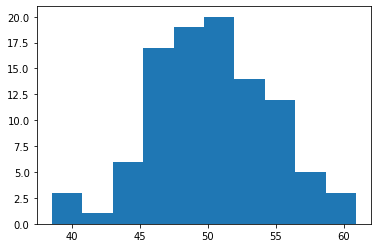

In [ ]:
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot

seed(1)
data = 5 * randn(100) + 50
pyplot.hist(data)
pyplot.show()

График QQ

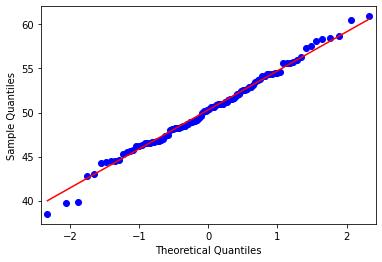

In [ ]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

seed(1)
data = 5 * randn(100) + 50
qqplot(data, line = 's')
pyplot.show()

**Статистические тесты нормальности**

Тест Шапиро-Вилка

In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

seed(1)
data = 5 * randn(100) + 50
stat, p = shapiro(data)
print('Statistics=%.3f, p = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject HO)')
else:
  print('Sample does not look Gaussian (reject HO)')

Statistics=0.992, p = 0.822
Sample looks Gaussian (fail to reject HO)


Тест д'Агостино на K ^ 2

In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest

seed(1)
data = 5 * randn(100) + 50
stat, p = normaltest(data)
print('Statistics=%.3f, p = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject HO)')
else:
  print('Sample does not look Gaussian (reject HO)')

Statistics=0.102, p = 0.950
Sample looks Gaussian (fail to reject HO)


Тест Андерсона-Дарлинга

In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson

seed(1)
data = 5 * randn(100) + 50
result = anderson(data)
print('Statistic: %.3f' % result.statistic)

p = 0
for i in range(len(result.critical_values)):
  sl, cv = result.significance_level[i], result.critical_values[i]
  if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f, data looks normal (fail to reject HO)' % (sl, cv))
  else:
    print('%.3f: %.3f, data does not look normal (reject HO)' % (sl, cv))

Statistic: 0.220
15.000: 0.555, data looks normal (fail to reject HO)
10.000: 0.632, data looks normal (fail to reject HO)
5.000: 0.759, data looks normal (fail to reject HO)
2.500: 0.885, data looks normal (fail to reject HO)
1.000: 1.053, data looks normal (fail to reject HO)


# **Индивидуальное задание**

Вариант 1. неструктурированных данных: использование данных с веб-страницы,
обеспечивающей информацией о самых кассовых фильмах России.
Highest-grossing Russian films
 (https://en.wikipedia.org/wiki/Cinema_of_Russia#List_of_highest-grossing_films)

In [ ]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Importing the data from the webpage into a DataFrame
url='https://en.wikipedia.org/wiki/Cinema_of_Russia#List_of_highest-grossing_films'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[1]
df.head()

,Rank,Title,Gross,Year,Genre,Details,Director
0,1,Сталинград Stalingrad,"$68,075,573",2013,War,A World War II film about Battle of Stalingrad,Fyodor Bondarchuk
1,2,Движение Вверх Going Vertical,"$66,000,000",2017,Sports drama,About 1972 Olympic Men's Basketball Final,Anton Megerdichev
2,3,Ирония судьбы. Продолжение Irony of Fate: The ...,"$55,639,114",2007,Romantic comedy,"A Christmas film, the sequel to a 1976 film of...",Timur Bekmambetov
3,4,Холоп Serf,"$47,500,000",2019,Comedy,NaN,Klim Shipenko
4,5,Дневной дозор Day Watch,"$42,918,532",2006,Fantasy,Based on urban fantasy book series Dozory by S...,Timur Bekmambetov


Так как для проверки нормальности данных нам нужны только числовые столбцы, избавимся от всего лишнего, почистим числовые данные, поработаем с их форматом.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rank      30 non-null     int64 
 1   Title     30 non-null     object
 2   Gross     30 non-null     object
 3   Year      30 non-null     int64 
 4   Genre     30 non-null     object
 5   Details   26 non-null     object
 6   Director  30 non-null     object
dtypes: int64(2), object(5)
memory usage: 1.8+ KB


In [ ]:
df['Gross']=df['Gross'].str.replace(r"$","").str.replace(r",","")

In [ ]:
df['Gross']=df['Gross'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rank      30 non-null     int64 
 1   Title     30 non-null     object
 2   Gross     30 non-null     int64 
 3   Year      30 non-null     int64 
 4   Genre     30 non-null     object
 5   Details   26 non-null     object
 6   Director  30 non-null     object
dtypes: int64(3), object(4)
memory usage: 1.8+ KB


In [ ]:
df.drop(['Rank','Title', 'Genre', 'Details', 'Director'],axis=1,inplace=True)

Теперь у нас остались только числовые столбцы (года и доходность) и столбец индексов, так работать будет удобнее и проще.

In [ ]:
df.head()

,Gross,Year
0,68075573,2013
1,66000000,2017
2,55639114,2007
3,47500000,2019
4,42918532,2006


Для применения статистических методовов преобразуем наш DataFrame в массив numpy

In [ ]:
import numpy as np
nmp_gross = df['Gross'].to_numpy()
nmp_year = df['Year'].to_numpy()
nmp_gross

array([68075573, 66000000, 55639114, 47500000, 42918532, 39539416,
       38135878, 38067427, 33951015, 31505876, 30496695, 29523237,
       27908763, 27544905, 26231525, 25646739, 25555809, 24965362,
       24830497, 23305571, 22772019, 22213287, 21500000, 21015154,
       20962988, 19390136, 19010585, 18500000, 18400000, 17808683])

**Визуальные проверки нормальности**

***График гистограммы***

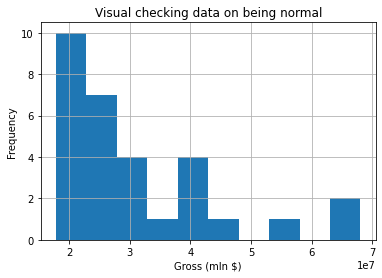

In [ ]:
nmp_gross_sorted = np.sort(nmp_gross)
fig, ax = plt.subplots()
ax.hist(nmp_gross_sorted)
ax.set_xlabel('Gross (mln $)')
ax.set_ylabel('Frequency')
ax.set_title('Visual checking data on being normal')
ax.grid(True)
pyplot.show()

In [ ]:
type(nmp_gross)

numpy.ndarray

Как мы видим, на графике ничего похожего на "горку" или "колокол" нет. Значит, данные нормальными не являются.

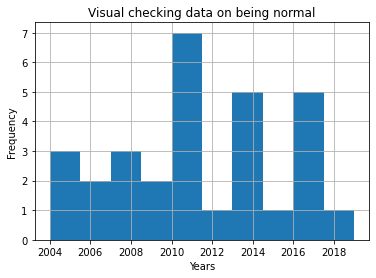

In [ ]:
nmp_year_sorted = np.sort(nmp_year)
fig, ax = plt.subplots()
ax.hist(nmp_year_sorted)
ax.set_xlabel('Years')
ax.set_ylabel('Frequency')
ax.set_title('Visual checking data on being normal')
ax.grid(True)
pyplot.show()

In [ ]:
type(nmp_year)

numpy.ndarray

Как мы видим, график отдаленно похож на "горку" или "колокол". Значит, данные вполне могут быть нормальными.

***График QQ***

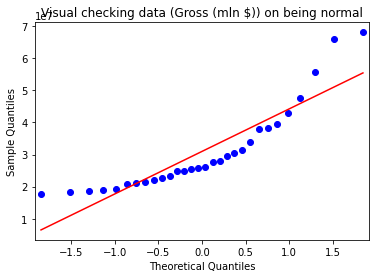

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(nmp_gross_sorted, line = 's')
pyplot.title('Visual checking data (Gross (mln $)) on being normal')
pyplot.show()

Как мы видим, некоторые данные находятся над линией, некоторые - под ней, то есть распределение неравное, а данные не нормальные

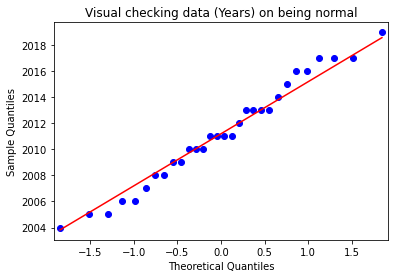

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(nmp_year_sorted, line = 's')
pyplot.title('Visual checking data (Years) on being normal')
pyplot.show()

Распределение данных о годах очень близко к нормальному, тк данные располагаются достаточно близко к линии нормального распределения

**Статистические тесты нормальности**

***Тест Шапиро-Вилка***

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(nmp_gross_sorted)
print('Statistics=%.3f, p = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject HO)')
else:
  print('Sample does not look Gaussian (reject HO)')

Statistics=0.820, p = 0.000
Sample does not look Gaussian (reject HO)


Тест не прошел. Метод Шапиро-Уилка показал, что наши данные по прибыльности нормальными не являются.

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(nmp_year_sorted)
print('Statistics=%.3f, p = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject HO)')
else:
  print('Sample does not look Gaussian (reject HO)')

Statistics=0.971, p = 0.566
Sample looks Gaussian (fail to reject HO)


А вот данные годов прошли тест Шапиро-Уилка и являются нормальными.

***Тест д'Агостино на K ^ 2***

In [ ]:
from scipy.stats import normaltest

stat, p = normaltest(nmp_gross_sorted)
print('Statistics=%.3f, p = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject HO)')
else:
  print('Sample does not look Gaussian (reject HO)')

Statistics=13.588, p = 0.001
Sample does not look Gaussian (reject HO)


Тест не прошел. Метод д'Агостино на K ^ 2 показал, что наши данные по прибыльности нормальными не являются.

In [ ]:
from scipy.stats import normaltest

stat, p = normaltest(nmp_year_sorted)
print('Statistics=%.3f, p = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject HO)')
else:
  print('Sample does not look Gaussian (reject HO)')

Statistics=1.499, p = 0.473
Sample looks Gaussian (fail to reject HO)


А вот данные годов прошли тест д'Агостино на K ^ 2 и являются нормальными.

***Тест Андерсона-Дарлинга***

In [ ]:
from scipy.stats import anderson

result = anderson(nmp_gross_sorted)
print('Statistic: %.3f' % result.statistic)

p = 0
for i in range(len(result.critical_values)):
  sl, cv = result.significance_level[i], result.critical_values[i]
  if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f, data looks normal (fail to reject HO)' % (sl, cv))
  else:
    print('%.3f: %.3f, data does not look normal (reject HO)' % (sl, cv))

Statistic: 1.799
15.000: 0.521, data does not look normal (reject HO)
10.000: 0.593, data does not look normal (reject HO)
5.000: 0.712, data does not look normal (reject HO)
2.500: 0.830, data does not look normal (reject HO)
1.000: 0.988, data does not look normal (reject HO)


Тест не прошел. Метод Андерсона-Дарлинга показал, что наши данные по прибыльности нормальными не являются.

In [ ]:
from scipy.stats import anderson

result = anderson(nmp_year_sorted)
print('Statistic: %.3f' % result.statistic)

p = 0
for i in range(len(result.critical_values)):
  sl, cv = result.significance_level[i], result.critical_values[i]
  if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f, data looks normal (fail to reject HO)' % (sl, cv))
  else:
    print('%.3f: %.3f, data does not look normal (reject HO)' % (sl, cv))

Statistic: 0.257
15.000: 0.521, data looks normal (fail to reject HO)
10.000: 0.593, data looks normal (fail to reject HO)
5.000: 0.712, data looks normal (fail to reject HO)
2.500: 0.830, data looks normal (fail to reject HO)
1.000: 0.988, data looks normal (fail to reject HO)


А вот данные годов прошли тест Андерсона-Дарлинга и являются нормальными.

# ***ВЫВОД***

Тесты и графики единогласно показали, что данные по прибыльности - не прошли проверку на нормальность, а данные по годам прошли и являются нормальными.